# Q Learning (table form)

From https://medium.com/analytics-vidhya/q-learning-is-the-most-basic-form-of-reinforcement-learning-which-doesnt-take-advantage-of-any-8944e02570c5

In [2]:
import gym
import numpy as np 
import matplotlib.pyplot as plt
import time

In [3]:
env = gym.make('CartPole-v0')
print(env.observation_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


/home/dimbulb/Desktop/Wkspace/_07IVO2022/GYM/tfgymenv/lib/python3.9/site-packages/gym/envs/registration.py:592: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/home/dimbulb/Desktop/Wkspace/_07IVO2022/GYM/tfgymenv/lib/python3.9/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/dimbulb/Desktop/Wkspace/_07IVO2022/GYM/tfgymenv/lib/python3.9/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [2]:
# CART POLE
env = gym.make('CartPole-v0')
print(env.observation_space.low,"\n",env.observation_space.high)
print(len(env.observation_space.low), env.action_space.n)

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38] 
 [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
4 2


/home/dimbulb/Desktop/Wkspace/_07IVO2022/GYM/tfgymenv/lib/python3.9/site-packages/gym/envs/registration.py:592: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/home/dimbulb/Desktop/Wkspace/_07IVO2022/GYM/tfgymenv/lib/python3.9/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/dimbulb/Desktop/Wkspace/_07IVO2022/GYM/tfgymenv/lib/python3.9/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
for _ in range(20):
    print(env.action_space.sample())

1
1
0
1
1
0
0
1
1
0
1
1
1
0
0
1
1
0
1
0


In [4]:
env = gym.make('CartPole-v0')
for _ in range(10):
    env.reset()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print(observation)
    print(reward, done)


[-0.03760828  0.18311079 -0.00471417 -0.33892694]
1.0 False
[ 0.01787401  0.18990935 -0.00694805 -0.25333998]
1.0 False
[-0.00466017  0.17285289  0.02281381 -0.2617301 ]
1.0 False
[-0.00667416 -0.2196561  -0.03548807  0.26247668]
1.0 False
[-0.01985005 -0.15904357  0.0490234   0.29170376]
1.0 False
[-0.00183143  0.22653529  0.04528014 -0.30284765]
1.0 False
[ 0.02665001  0.15262018 -0.01961316 -0.28127587]
1.0 False
[ 0.03536367  0.2274291   0.03204949 -0.31062716]
1.0 False
[ 0.01613232 -0.14942825 -0.0239276   0.2751043 ]
1.0 False
[-0.04933099 -0.1895378   0.00625935  0.32520646]
1.0 False


In [5]:
30*30*30*30

810000

In [6]:
def Qtable(obs_space,action_space,bin_size = 30):
    
    bins = [np.linspace(-4.8,4.8,bin_size),
            np.linspace(-4,4,bin_size),
            np.linspace(-0.418,0.418,bin_size),
            np.linspace(-4,4,bin_size)]
    
    q_table = np.random.uniform(low=-1,high=1,size=([bin_size] * obs_space + [action_space]))
    return q_table, bins

def Discrete(state, bins):
    index = []
    for i in range(len(state)): 
        index.append(np.digitize(state[i],bins[i]) - 1)
    return tuple(index)

In [7]:
qtable,bins = Qtable(4,2)

In [8]:
print(qtable.shape)
print(bins)

(30, 30, 30, 30, 2)
[array([-4.8       , -4.46896552, -4.13793103, -3.80689655, -3.47586207,
       -3.14482759, -2.8137931 , -2.48275862, -2.15172414, -1.82068966,
       -1.48965517, -1.15862069, -0.82758621, -0.49655172, -0.16551724,
        0.16551724,  0.49655172,  0.82758621,  1.15862069,  1.48965517,
        1.82068966,  2.15172414,  2.48275862,  2.8137931 ,  3.14482759,
        3.47586207,  3.80689655,  4.13793103,  4.46896552,  4.8       ]), array([-4.        , -3.72413793, -3.44827586, -3.17241379, -2.89655172,
       -2.62068966, -2.34482759, -2.06896552, -1.79310345, -1.51724138,
       -1.24137931, -0.96551724, -0.68965517, -0.4137931 , -0.13793103,
        0.13793103,  0.4137931 ,  0.68965517,  0.96551724,  1.24137931,
        1.51724138,  1.79310345,  2.06896552,  2.34482759,  2.62068966,
        2.89655172,  3.17241379,  3.44827586,  3.72413793,  4.        ]), array([-0.418     , -0.38917241, -0.36034483, -0.33151724, -0.30268966,
       -0.27386207, -0.24503448, -0.216

In [9]:
current_state = Discrete(env.reset(),bins)
print(current_state)

(14, 14, 14, 14)


In [10]:
def Q_learning(q_table, bins, episodes = 5000, gamma = 0.95, lr = 0.1, timestep = 5000, epsilon = 0.2):
    rewards = 0
    solved = False 
    steps = 0 
    runs = [0]
    data = {'max' : [0], 'avg' : [0]}
    start = time.time()
    ep = [i for i in range(0,episodes + 1,timestep)] 
    
    for episode in range(1,episodes+1):
        
        current_state = Discrete(env.reset(),bins) # initial observation
        score = 0
        done = False
        temp_start = time.time()
        
        while not done:
            steps += 1 
            ep_start = time.time()
            if episode%timestep == 0:
                env.render()
                
            if np.random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[current_state])
            
            observation, reward, done, info = env.step(action)
            next_state = Discrete(observation,bins)

            score += reward
            

            if not done:
                max_future_q = np.max(q_table[next_state])
                current_q = q_table[current_state+(action,)]
                new_q = (1-lr)*current_q + lr*(reward + gamma*max_future_q)
                q_table[current_state+(action,)] = new_q

            current_state = next_state
            
        # End of the loop update
        else:
            rewards += score
            runs.append(score)
            if score > 195 and steps >= 100 and solved == False: # considered as a solved:
                solved = True
                print('Solved in episode : {} in time {}'.format(episode, (time.time()-ep_start)))
        
        # Timestep value update
        if episode%timestep == 0:
            print('Episode : {} | Reward -> {} | Max reward : {} | Time : {}'.format(episode,rewards/timestep, max(runs), time.time() - ep_start))
            data['max'].append(max(runs))
            data['avg'].append(rewards/timestep)
            if rewards/timestep >= 195: 
                print('Solved in episode : {}'.format(episode))
            rewards, runs= 0, [0] 
            
    if len(ep) == len(data['max']):
        plt.plot(ep, data['max'], label = 'Max')
        plt.plot(ep, data['avg'], label = 'Avg')
        plt.xlabel('Episode')
        plt.ylabel('Reward')
        plt.legend(loc = "upper left")
        
    env.close()

/home/dimbulb/Desktop/Wkspace/_07IVO2022/GYM/tfgymenv/lib/python3.9/site-packages/gym/core.py:57: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode : 1000 | Reward -> 36.818 | Max reward : 150.0 | Time : 0.020084857940673828
Solved in episode : 1596 in time 8.940696716308594e-05
Episode : 2000 | Reward -> 85.192 | Max reward : 200.0 | Time : 0.020183324813842773
Episode : 3000 | Reward -> 106.934 | Max reward : 200.0 | Time : 0.019983768463134766
Episode : 4000 | Reward -> 127.873 | Max reward : 200.0 | Time : 0.02541184425354004
Episode : 5000 | Reward -> 147.895 | Max reward : 200.0 | Time : 0.020712852478027344


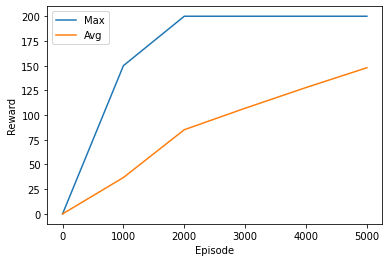

In [11]:
# TRANING
q_table, bins = Qtable(len(env.observation_space.low), env.action_space.n)

Q_learning(q_table, bins, lr = 0.15, gamma = 0.995, episodes = 5*10**3, timestep = 1000)